In [1]:
# ライブラリのインポート
import numpy as np
import keras
from sklearn.preprocessing import MinMaxScaler
# モデルの視覚化
from tensorflow.keras.utils import plot_model
import joblib

In [36]:
# どれくらいの期間を基に予測するか　（例：★ここでは24
window_size = 24
npyname = "kddi_18_03res_param"
readname = "kddi_18"

In [37]:
# 交通量データの読込み
timeseries_aug = np.load("./"+npyname+".npy", allow_pickle=True)

In [38]:
timeseries_aug

array([[[-1.29942954e-01,  4.53081168e-03,  7.06819117e-01, ...,
          1.11773062e+00, -3.56468976e-01, -4.79993373e-01],
        [-7.85965472e-02,  7.32132345e-02,  1.03786623e+00, ...,
          5.37903666e-01, -2.67633470e-03, -1.22422412e-01],
        [ 3.01075019e-02,  3.86693567e-01,  3.05742085e-01, ...,
          1.33093047e+00, -1.19968779e-01, -2.90439844e-01],
        ...,
        [ 5.04391342e-02,  3.27259041e-02,  1.25383381e-02, ...,
          4.63396430e-01, -1.52826607e-01, -4.53658290e-02],
        [ 3.06478795e-02,  2.02710815e-02,  1.15571488e-02, ...,
          4.23128158e-01, -1.28880531e-01, -3.26925889e-02],
        [ 8.17433000e-03,  1.90720502e-02,  1.10351779e-02, ...,
          5.97345054e-01, -1.02755204e-01,  1.65408999e-02]],

       [[-1.08338960e-01, -2.73385048e-01,  8.08724701e-01, ...,
          2.85705924e-01,  3.92688997e-02, -2.01209694e-01],
        [ 5.81979901e-02, -1.24305896e-01, -1.13104507e-01, ...,
          6.53768241e-01,  8.80259126e

In [39]:
# 保存したScalerの読込み
scalers = joblib.load(readname+'_scaler.gz')

In [40]:
# トレーニングデータの大きさを取得
# 全体の80%をトレーニングデータとして扱う）
training_data_len = int(np.ceil(len(timeseries_aug) * 1))

In [41]:
# （予測用）
x_test = []
# テスト用予測データ
for i in range(window_size, len(timeseries_aug)):
    ##  timestep 24hの場合：0 → 24, 1 → 25 ・・・
    x_test.append(timeseries_aug[i-window_size:i, :])

In [42]:
# 訓練（学習）データと教師（正解）データをnumpy arrayに変換
x_train = np.array(x_test)

In [43]:
model = keras.models.load_model(readname + '_model.h5')

In [44]:
plot_model(model,show_shapes=True)
history = model.fit(x_train, x_train, batch_size=8, epochs=30)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/30


ValueError: in user code:

    File "C:\Users\BIGDATA_DEV\anaconda3\envs\bigdata_dev\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\BIGDATA_DEV\anaconda3\envs\bigdata_dev\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\BIGDATA_DEV\anaconda3\envs\bigdata_dev\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\BIGDATA_DEV\anaconda3\envs\bigdata_dev\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\BIGDATA_DEV\anaconda3\envs\bigdata_dev\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\BIGDATA_DEV\anaconda3\envs\bigdata_dev\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 24, 9995), found shape=(8, 24, 24, 9995)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 128)           5183488   
                                                                 
 dropout_1 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 24, 64)           0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 24, 64)            33024     
                                                                 
 lstm_7 (LSTM)               (None, 24, 128)           98816     
                                                      

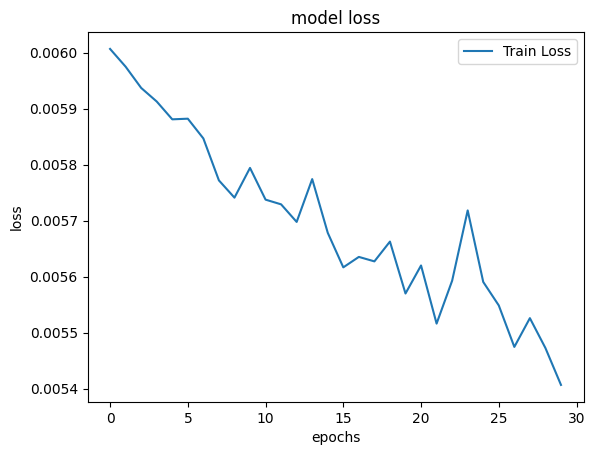

In [18]:
# モデルの概要
model.summary()

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [19]:
# モデルの保存　⇔ モデルの読込み model = load_model('traffic_pattern.h5')
model.save(npyname + '_model2.h5')